# Fake News Detection using NLP

**British university in Egypt** \\
*ICS*

---

### STUDENT DETAIL:
- **Omar Islam**
  - Email: omar219127@bue.edu.eg
  - Student ID: 219127


---



## Introduction

In this project, we will build a fake news detection model using Natural Language Processing (NLP) techniques. We have a dataset consisting of genuine and fake articles' titles and text, and our goal is to distinguish between them.

## Step 1: Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\Omar
[nltk_data]     Islam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Omar
[nltk_data]     Islam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Step 2: Load and Explore the Dataset

In [2]:
# Load the dataset
true_df = pd.read_csv('dataset/True.csv')
false_df = pd.read_csv('dataset/Fake.csv')

# Add labels to indicate real and fake news
true_df['label'] = 1
false_df['label'] = 0

# Concatenate both datasets
data = pd.concat([true_df, false_df])

In [3]:
#True dataset
true_df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [4]:
#Fake dataset
false_df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


## Step 3: Data Preprocessing

In [5]:
# Lowercasing and tokenization
data['text'] = data['text'].str.lower()
data['title'] = data['title'].str.lower()
data['text'] = data['text'].apply(nltk.word_tokenize)
data['title'] = data['title'].apply(nltk.word_tokenize)

# Remove stopwords
stop_words = set(stopwords.words('english'))
data['text'] = data['text'].apply(lambda x: [word for word in x if word not in stop_words])
data['title'] = data['title'].apply(lambda x: [word for word in x if word not in stop_words])

## Step 4: Feature Extraction (TF-IDF)

In [6]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
text_tfidf = tfidf_vectorizer.fit_transform(data['text'].apply(lambda x: ' '.join(x)))
title_tfidf = tfidf_vectorizer.transform(data['title'].apply(lambda x: ' '.join(x)))


## Step 5: Split the Data into Training and Testing Sets

In [7]:
X = text_tfidf
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Display the shapes of training and testing data
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (35918, 5000)
X_test shape: (8980, 5000)
y_train shape: (35918,)
y_test shape: (8980,)


# Step 6: Model Training

 Training our model with different algorithms using the training data and evaluating its performance on the testing data.



# **Multinomial Naive Bayes Model**

Accuracy: 0.94


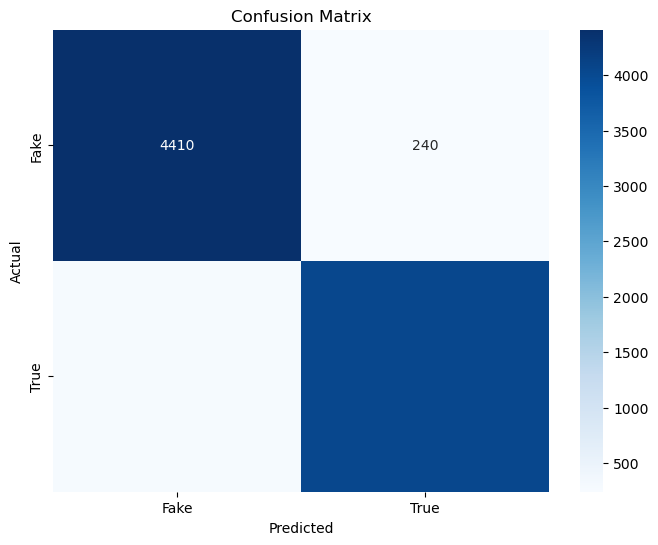

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      4650
           1       0.94      0.94      0.94      4330

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980



In [8]:
# Initialize and train the Multinomial Naive Bayes model
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train, y_train)

# Predict on the test data
y_pred = naive_bayes_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Format and display the metrics
print(f"Accuracy: {accuracy:.2f}")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
print("Classification Report:")
print(classification_rep)


# **Decision Tree**

In [9]:
from sklearn.tree import DecisionTreeClassifier

# Define and train the Decision Tree model
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# Evaluate the Decision Tree model
def evaluate_decision_tree(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    return accuracy, confusion, classification_rep

# Evaluate Decision Tree
dt_accuracy, dt_confusion, dt_classification = evaluate_decision_tree(decision_tree, X_test, y_test)
print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree Confusion Matrix:\n", dt_confusion)
print("Decision Tree Classification Report:\n", dt_classification)


Decision Tree Accuracy: 0.9973273942093541
Decision Tree Confusion Matrix:
 [[4640   10]
 [  14 4316]]
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4650
           1       1.00      1.00      1.00      4330

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



# **Passive Aggressive Classifier**

In [10]:
from sklearn.linear_model import PassiveAggressiveClassifier

# Define and train the Passive Aggressive Classifier model
passive_aggressive = PassiveAggressiveClassifier()
passive_aggressive.fit(X_train, y_train)

# Evaluate the Passive Aggressive Classifier model
def evaluate_passive_aggressive(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    return accuracy, confusion, classification_rep

# Evaluate Passive Aggressive Classifier
pa_accuracy, pa_confusion, pa_classification = evaluate_passive_aggressive(passive_aggressive, X_test, y_test)
print("Passive Aggressive Classifier Accuracy:", pa_accuracy)
print("Passive Aggressive Classifier Confusion Matrix:\n", pa_confusion)
print("Passive Aggressive Classifier Classification Report:\n", pa_classification)


Passive Aggressive Classifier Accuracy: 0.9968819599109131
Passive Aggressive Classifier Confusion Matrix:
 [[4633   17]
 [  11 4319]]
Passive Aggressive Classifier Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4650
           1       1.00      1.00      1.00      4330

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



# **Random Forest**

In [11]:
from sklearn.ensemble import RandomForestClassifier

# Define and train the Random Forest model
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

# Evaluate the Random Forest model
def evaluate_random_forest(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    return accuracy, confusion, classification_rep

# Evaluate Random Forest
rf_accuracy, rf_confusion, rf_classification = evaluate_random_forest(random_forest, X_test, y_test)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Confusion Matrix:\n", rf_confusion)
print("Random Forest Classification Report:\n", rf_classification)


Random Forest Accuracy: 0.9979955456570155
Random Forest Confusion Matrix:
 [[4641    9]
 [   9 4321]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4650
           1       1.00      1.00      1.00      4330

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



# **Logistic Regression**

In [12]:
from sklearn.linear_model import LogisticRegression

# Define and train the Logistic Regression model
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

# Evaluate the Logistic Regression model
def evaluate_logistic_regression(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    return accuracy, confusion, classification_rep

# Evaluate Logistic Regression
lr_accuracy, lr_confusion, lr_classification = evaluate_logistic_regression(logistic_regression, X_test, y_test)
print("Logistic Regression Accuracy:", lr_accuracy)
print("Logistic Regression Confusion Matrix:\n", lr_confusion)
print("Logistic Regression Classification Report:\n", lr_classification)


Logistic Regression Accuracy: 0.9922048997772829
Logistic Regression Confusion Matrix:
 [[4603   47]
 [  23 4307]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      4650
           1       0.99      0.99      0.99      4330

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



#Step 7: Model Validation and Evaluation


# **Logistic Regression**

In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Testing and evaluating Logistic Regression
lr_test_predictions = logistic_regression.predict(X_test)
lr_test_precision = precision_score(y_test, lr_test_predictions)
lr_test_recall = recall_score(y_test, lr_test_predictions)
lr_test_f1 = f1_score(y_test, lr_test_predictions)

# Print precision, recall, and F1 score for Logistic Regression
print("Logistic Regression Test Precision:", lr_test_precision)
print("Logistic Regression Test Recall:", lr_test_recall)
print("Logistic Regression Test F1 Score:", lr_test_f1)

# Repeat the testing and evaluation for the other classifiers (Random Forest, Passive Aggressive, Decision Tree)



Logistic Regression Test Precision: 0.9892053284336243
Logistic Regression Test Recall: 0.994688221709007
Logistic Regression Test F1 Score: 0.991939198526025


# **Random forest**

In [14]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Testing the Random Forest model on the test data
rf_test_predictions = random_forest.predict(X_test)

# Evaluate Random Forest on the test data
rf_test_precision = precision_score(y_test, rf_test_predictions)
rf_test_recall = recall_score(y_test, rf_test_predictions)
rf_test_f1 = f1_score(y_test, rf_test_predictions)

# Print precision, recall, and F1 score for Random Forest
print("Random Forest Test Precision:", rf_test_precision)
print("Random Forest Test Recall:", rf_test_recall)
print("Random Forest Test F1 Score:", rf_test_f1)


Random Forest Test Precision: 0.9979214780600462
Random Forest Test Recall: 0.9979214780600462
Random Forest Test F1 Score: 0.9979214780600462


# **Passive Aggressive Classifier**

In [15]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Testing the Passive Aggressive Classifier model on the test data
pa_test_predictions = passive_aggressive.predict(X_test)

# Evaluate Passive Aggressive Classifier on the test data
pa_test_precision = precision_score(y_test, pa_test_predictions)
pa_test_recall = recall_score(y_test, pa_test_predictions)
pa_test_f1 = f1_score(y_test, pa_test_predictions)

# Print precision, recall, and F1 score for Passive Aggressive Classifier
print("Passive Aggressive Classifier Test Precision:", pa_test_precision)
print("Passive Aggressive Classifier Test Recall:", pa_test_recall)
print("Passive Aggressive Classifier Test F1 Score:", pa_test_f1)


Passive Aggressive Classifier Test Precision: 0.996079335793358
Passive Aggressive Classifier Test Recall: 0.997459584295612
Passive Aggressive Classifier Test F1 Score: 0.9967689822294022


# **Decision Tree**

In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Testing the Decision Tree model on the test data
dt_test_predictions = decision_tree.predict(X_test)

# Evaluate Decision Tree on the test data
dt_test_precision = precision_score(y_test, dt_test_predictions)
dt_test_recall = recall_score(y_test, dt_test_predictions)
dt_test_f1 = f1_score(y_test, dt_test_predictions)

# Print precision, recall, and F1 score for Decision Tree
print("Decision Tree Test Precision:", dt_test_precision)
print("Decision Tree Test Recall:", dt_test_recall)
print("Decision Tree Test F1 Score:", dt_test_f1)


Decision Tree Test Precision: 0.9976883957466481
Decision Tree Test Recall: 0.9967667436489608
Decision Tree Test F1 Score: 0.9972273567467653


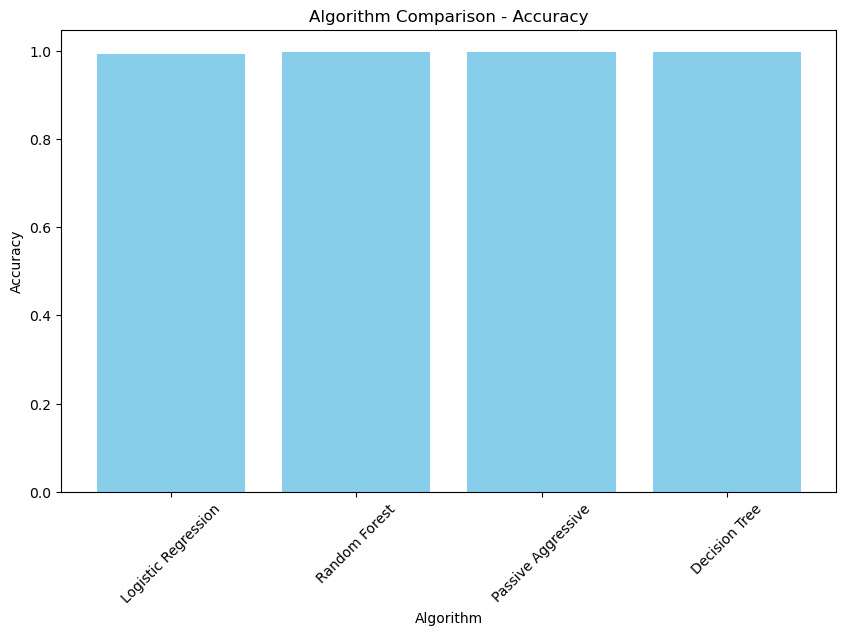

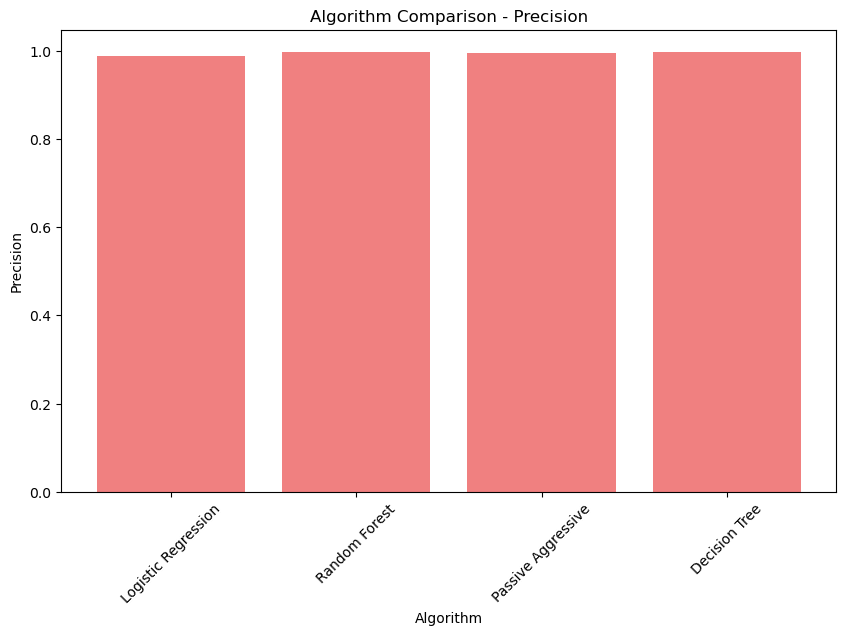

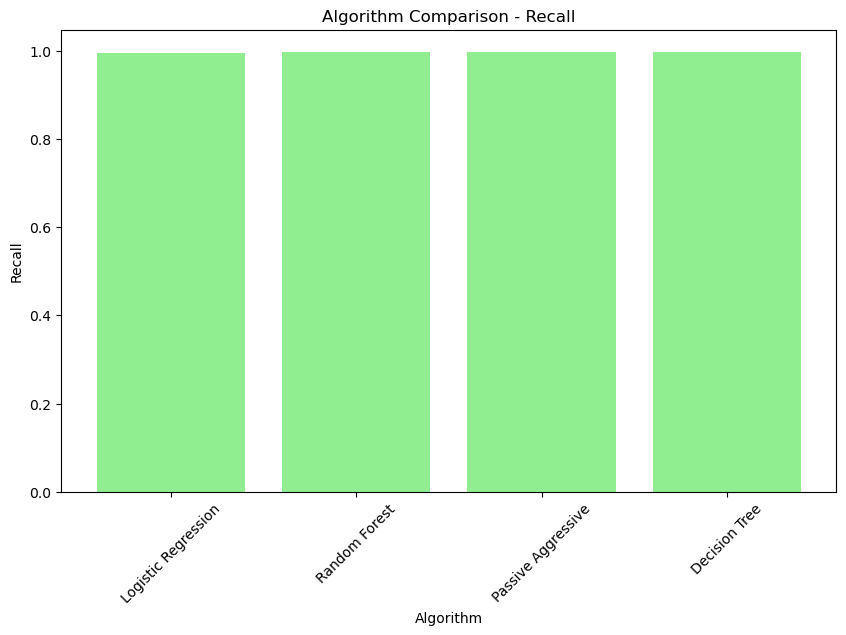

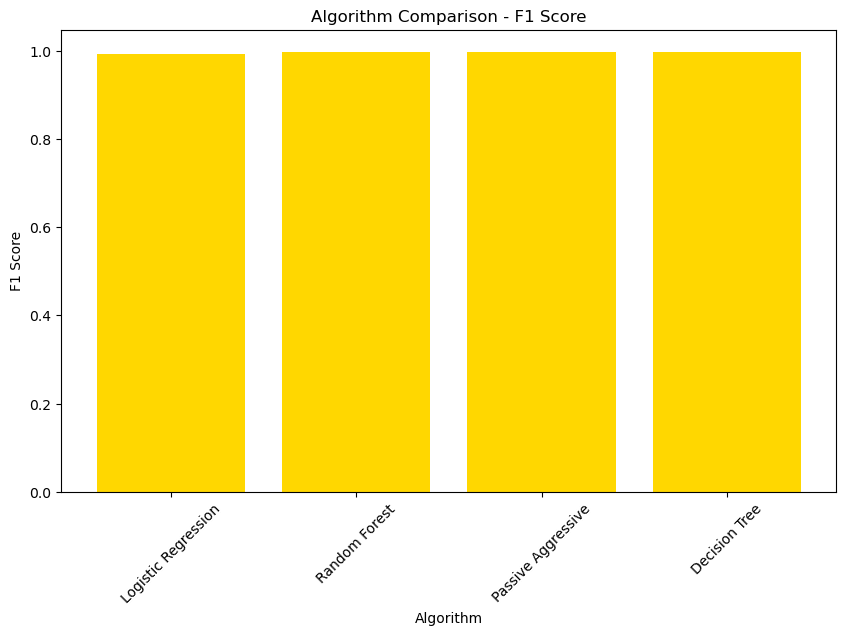

In [17]:
import matplotlib.pyplot as plt

# Define the algorithm names and their corresponding metrics
algorithms = ['Logistic Regression', 'Random Forest', 'Passive Aggressive', 'Decision Tree']
accuracies = [lr_accuracy, rf_accuracy, pa_accuracy, dt_accuracy]
precisions = [lr_test_precision, rf_test_precision, pa_test_precision, dt_test_precision]
recalls = [lr_test_recall, rf_test_recall, pa_test_recall, dt_test_recall]
f1_scores = [lr_test_f1, rf_test_f1, pa_test_f1, dt_test_f1]

# Create a bar chart for accuracy
plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracies, color='skyblue')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Algorithm Comparison - Accuracy')
plt.xticks(rotation=45)
plt.show()

# Create a bar chart for precision
plt.figure(figsize=(10, 6))
plt.bar(algorithms, precisions, color='lightcoral')
plt.xlabel('Algorithm')
plt.ylabel('Precision')
plt.title('Algorithm Comparison - Precision')
plt.xticks(rotation=45)
plt.show()

# Create a bar chart for recall
plt.figure(figsize=(10, 6))
plt.bar(algorithms, recalls, color='lightgreen')
plt.xlabel('Algorithm')
plt.ylabel('Recall')
plt.title('Algorithm Comparison - Recall')
plt.xticks(rotation=45)
plt.show()

# Create a bar chart for F1 score
plt.figure(figsize=(10, 6))
plt.bar(algorithms, f1_scores, color='gold')
plt.xlabel('Algorithm')
plt.ylabel('F1 Score')
plt.title('Algorithm Comparison - F1 Score')
plt.xticks(rotation=45)
plt.show()


<Figure size 1200x800 with 0 Axes>

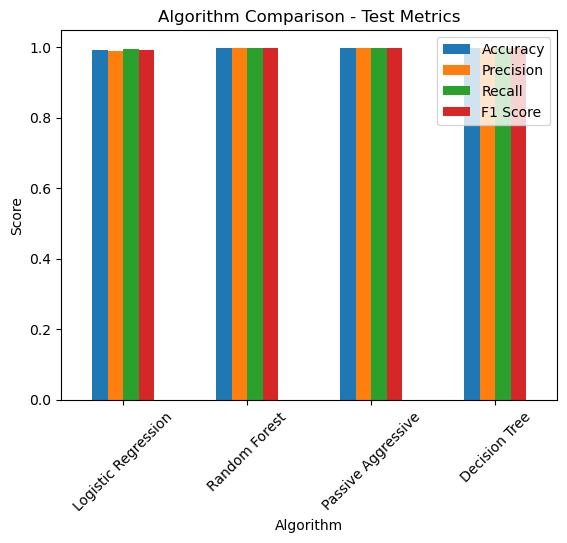

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the algorithm names and their corresponding metrics
algorithms = ['Logistic Regression', 'Random Forest', 'Passive Aggressive', 'Decision Tree']
accuracy_scores = [lr_accuracy, rf_accuracy, pa_accuracy, dt_accuracy]
precision_scores = [lr_test_precision, rf_test_precision, pa_test_precision, dt_test_precision]
recall_scores = [lr_test_recall, rf_test_recall, pa_test_recall, dt_test_recall]
f1_scores = [lr_test_f1, rf_test_f1, pa_test_f1, dt_test_f1]

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Algorithm': algorithms,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores
})

# Set the algorithm column as the index for plotting
results_df.set_index('Algorithm', inplace=True)

# Create a bar chart for all metrics
plt.figure(figsize=(12, 8))
results_df.plot(kind='bar', stacked=False)
plt.xlabel('Algorithm')
plt.ylabel('Score')
plt.title('Algorithm Comparison - Test Metrics')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()


# **MODEL VALIDATION**
## *News Prediction*

In [19]:
import nltk
from nltk.corpus import stopwords

# Define a function for predicting titles
def predict_title(title_text):
    # Preprocess the title
    preprocessed_title_text = title_text.lower()
    preprocessed_title_text = nltk.word_tokenize(preprocessed_title_text)
    preprocessed_title_text = [word for word in preprocessed_title_text if word not in stop_words]

    # Convert the preprocessed text into TF-IDF vectors
    tfidf_vector = tfidf_vectorizer.transform([" ".join(preprocessed_title_text)])

    # Make the prediction
    prediction = naive_bayes_model.predict(tfidf_vector)

    return prediction

# Example titles
title_text_1 = "Donald Trump Sends Out Embarrassing New Year"
title_text_2 = "As U.S. budget fight looms, Republicans flip their fiscal script"

# Predict and display results for both titles
prediction_1 = predict_title(title_text_1)
prediction_2 = predict_title(title_text_2)

if prediction_1 == 1:
    print("Title 1: The news is likely true.")
else:
    print("Title 1: The news is likely fake.")

if prediction_2 == 1:
    print("Title 2: The news is likely true.")
else:
    print("Title 2: The news is likely fake.")


Title 1: The news is likely fake.
Title 2: The news is likely true.


# **MODEL Explaining why new is Fake**
## *LIME*

In [24]:
from lime import lime_text
from lime.lime_text import LimeTextExplainer

# Function to predict class probabilities
def predict_proba(texts):
    tfidf_texts = tfidf_vectorizer.transform(texts)
    probas = naive_bayes_model.predict_proba(tfidf_texts)
    return probas  # Return the full probability array

# Initialize LIME explainer
explainer = LimeTextExplainer(class_names=['Fake', 'True'])

# Choose an instance to explain
idx = 0  # You can change this index to explain different instances
instance = X_test.iloc[idx]  # Use the original text data

# Explain the prediction
exp = explainer.explain_instance(instance, predict_proba, num_features=10)

# Show the explanation
exp.show_in_notebook(text=True)